For immersion: https://www.youtube.com/watch?v=sdBrscwwy_c

# 🌟 Operation NeuroNexus

Trondheim lies under the iron grip of SkyNet, an AI system that has seized control of the city's entire digital infrastructure. You and your team of elite hackers have been tasked with a crucial mission: infiltrate SkyNet's systems, decode its defenses, and liberate the city from its digital oppressor.

## 🎯 Mission Overview

Operation NeuroNexus consists of four independent, yet interconnected missions. Each mission targets a different aspect of SkyNet's infrastructure and requires you to apply various Supervised Learning techniques covered in this course.

## 📊 Mission Structure

1. Each mission has a specific task related to combating SkyNet.
2. Following the task description, you'll find a set of formal requirements that your solution must meet.
3. The primary measure of your success is the accuracy of your machine learning model.
4. After completing each task, you must answer a series of questions to demonstrate your understanding of the techniques used.

## 🧪 A Note on Test Data

In a departure from real-world scenarios, you will have access to the target variables of the test sets for each mission. This has been arranged to facilitate the evaluation of your models. However, remember that in actual machine learning projects, test targets are not available, as predicting these is the ultimate goal of your supervised models.

## 📝 Submission Guidelines

- For each mission, provide your code solution and model results inside this notebook.
- Answer the follow-up questions in markdown format within this notebook. A few sentences is enough, no requirements for length of answers.
- Ensure your explanations are clear, concise, and demonstrate a deep understanding of the techniques employed.


Good luck! The resistance is counting on you.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

## 🌞 Mission 1: Predicting SkyNet's Power Consumption

### 🎯 The Mission
Intelligence suggests that SkyNet has a critical weakness: **its power consumption**. We must understand its energy needs to plan a coordinated strike.

### 🧠 Your Task
Develop a predictive model to estimate SkyNet's power consumption based on its **Network Activity**.

**Goal**: Implement a **Linear Regression model using Gradient Descent, from scratch**.

Use `LinearRegression` class from `linear_regression.py` stored in this folder. Your task is to complete two functions: `fit` (find the optimal parameters of the regression) and `predict` (apply them to the test data).

> Note: The `%autoreload` IPython magic command allows instant updates from `linear_regression.py`.

### 📊 Formal Requirements
1. **Implementation**: 
   - Use standard Python libraries (numpy, math, pandas, etc.)
   - Implement gradient descent

2. **Discussion**:

   a. Visualize the fitted curve. Derive the resulting Energy consumption formula.
   
   b. Analyze prediction error distribution. What is an unbiased estimator?

---

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
# Import your implementation
from linear_regression import LinearRegression # <--- This is your implementation

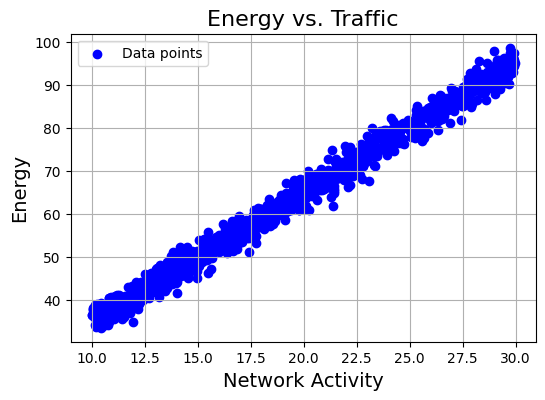

In [4]:
# Load data
data = pd.read_csv('mission1.csv')

plt.figure(figsize=(6, 4))
plt.scatter(data['Net_Activity'], data['Energy'], c='blue', label='Data points')
plt.grid(True)
plt.xlabel('Network Activity', fontsize=14)
plt.ylabel('Energy', fontsize=14)
plt.title('Energy vs. Traffic', fontsize=16)
plt.legend()
plt.show()

In [5]:
lr = LinearRegression()

lr.fit(data['Net_Activity'], data['Energy'], 10000)

lr.predict(data['Net_Activity'])

0      95.852447
1      59.597634
2      95.771148
3      33.002534
4      96.405392
         ...    
995    32.794113
996    46.365746
997    88.177694
998    64.918594
999    42.412447
Name: Net_Activity, Length: 1000, dtype: float64

#### Mission 1 Discussion

After performing the fit function, I get the following linear regression (energy consumption) formula

In [6]:
print("Final formula:", lr.get_formula(5))

# Estimate RMSE
y_pred = lr.predict(data['Net_Activity'])
print("RMSE:", lr.rmse(y_pred, data['Energy']))

Final formula: y = 3.19695x + 0.81379
RMSE: 2.2852970246381803


We see that this linear regression fits the Data quite well

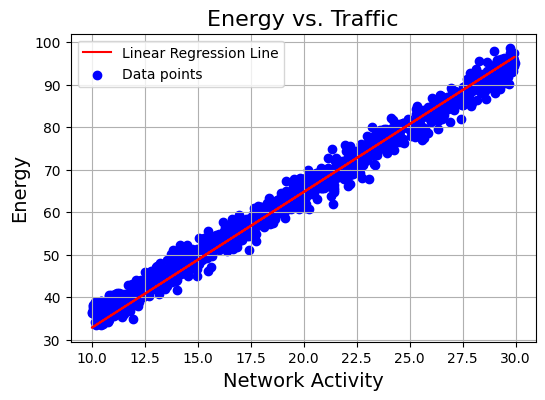

In [7]:
# Load data
plt.figure(figsize=(6, 4))
plt.plot(data['Net_Activity'], lr.predict(data['Net_Activity']), color='red', label='Linear Regression Line')
plt.scatter(data['Net_Activity'], data['Energy'], c='blue', label='Data points')
plt.grid(True)
plt.xlabel('Network Activity', fontsize=14)
plt.ylabel('Energy', fontsize=14)
plt.title('Energy vs. Traffic', fontsize=16)
plt.legend()
plt.show()

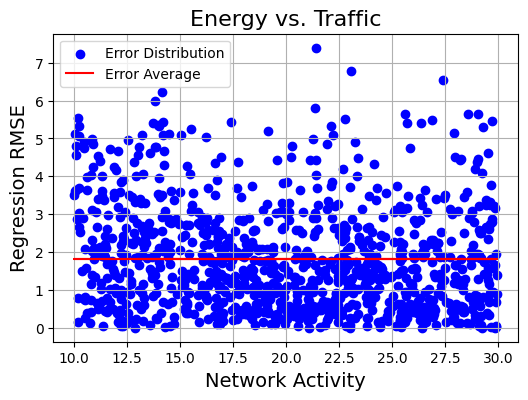

In [8]:
# Load data
data = pd.read_csv('mission1.csv')
error = lr.get_error_distribution(data['Net_Activity'], data['Energy'])

plt.figure(figsize=(6, 4))
plt.scatter(data['Net_Activity'], error, color='blue', label='Error Distribution')
plt.plot(data['Net_Activity'], np.full_like(error, np.average(error), dtype=float), color='red', label='Error Average')
plt.plot
plt.grid(True)
plt.xlabel('Network Activity', fontsize=14)
plt.ylabel('Regression RMSE', fontsize=14)
plt.title('Energy vs. Traffic', fontsize=16)
plt.legend()
plt.show()

An unbiased estimator is an estimator that has an average estimation equating the true value. Aka one that on average, gives the correct estimation, with an average Error distribution of 0, or atleast very close. As we see with the plot above, we see that our estimator is not unbiased as it's average RMSE is closer to 2, rather than 0

## 🧠 Mission 2: Decoding SkyNet's signals

### 🌐 The Discovery
We've intercepted two types of signals that may determine SkyNet's next moves.

### 🎯 Your Mission
1. Evolve your linear regression into logistic regression
2. Engineer features to unravel hidden connections
3. Predict SkyNet's binary decisions (0 or 1) from paired signals

### 📊 Formal Requirements
1. **Implementation**: 
   - Use standard Python libraries
   - Implement gradient descent

2. **Performance**: Achieve at least 0.88 accuracy on the test set

3. **Discussion**:

   a. Explain poor initial performance and your improvements

   b. What is the model's inductive bias. Why is it important?

   c. Try to solve the problem using `sklearn.tree.DecisionTreeClassifier`. Can it solve the problem? Why/Why not?
   
   d. Plot the ROC curve

---

In [9]:
from log_regression import LogRegression
import sklearn.tree as tree

In [10]:
data = pd.read_csv('mission2.csv')
train = data[data['split'] == 'train']
test = data[data['split'] == 'test']

train_x = train.iloc[:, :-2]
test_x = test.iloc[:, :-2]

train_y = train.iloc[:, -2]
test_y = test.iloc[:, -2]

lg = LogRegression(degrees=2)

In [11]:
print(train_x, train_y)

           x0        x1
0    0.377044  0.587023
1   -1.222865  1.514124
2   -0.036282 -1.562136
3   -1.217459  0.151372
4    0.072188  0.503239
..        ...       ...
495 -0.796331  1.795741
496  0.279699 -0.572485
497  0.648313 -1.974123
498  0.672983 -0.449303
499  0.867427  0.253261

[500 rows x 2 columns] 0      0.0
1      1.0
2      0.0
3      1.0
4      0.0
      ... 
495    1.0
496    1.0
497    1.0
498    1.0
499    0.0
Name: y, Length: 500, dtype: float64


Epoch 0: cost=0.6971
Epoch 50000: cost=0.5395
Epoch 100000: cost=0.4999
Epoch 150000: cost=0.4814
Epoch 200000: cost=0.4708
Epoch 250000: cost=0.4640
Epoch 300000: cost=0.4593
Epoch 350000: cost=0.4559
Epoch 400000: cost=0.4534
Epoch 450000: cost=0.4515


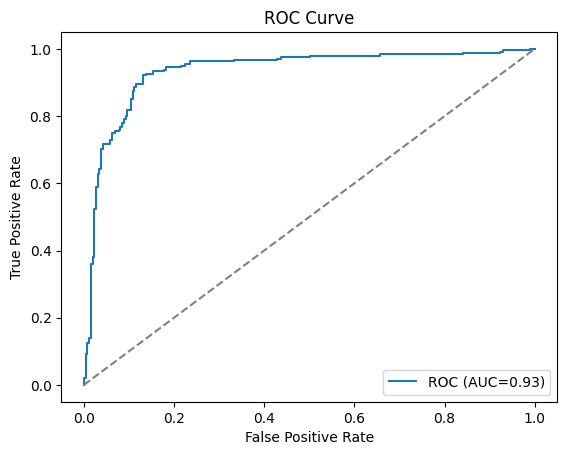

{'accuracy': 0.862, 'roc_auc': 0.9332094394335059}

In [12]:
lg.fit(train_x, train_y, lr=1e-4, epoch=500000, verbose=True)

lg.measure_accuracy(test_x, test_y, tresh=0.5, plot_roc=True)

In [13]:
from sklearn.metrics import accuracy_score

decitionTree = tree.DecisionTreeClassifier()
decitionTree.fit(train_x, train_y)
accuracy_score(test_y, decitionTree.predict(test_x, True))

0.874

## 🌆 Mission 3: CyberGuard

### 🌐 The Discovery
SkyNet's drone communications use binary encryption. We need a system to intercept these messages.

### 🎯 Your Mission
Develop a decision tree classifier to process intercepted communications. Use `sklearn.tree.DecisionTreeClassifier`. 

Only one of the data streams needs to be decrypted, but you will need to identify the correct one.

To decrypt a data stream, transform the data into a binary representation based on whether the feature is even or odd.

### 📊 Formal Requirements
1. **Accuracy**: Achieve ROC AUC >= 0.72 on the test set
2. **Discussion**:

   a. Explain your threshold-breaking strategy. Did you change the default hyperparameters?

   b. Justify ROC AUC usage. Plot and interpret ROC.
   
   c. Try to solve the problem using sklearn’s Random Forest Classifier. Compare the results.

---

In [14]:
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
from sklearn import tree, ensemble

In [15]:
def predict_even_odd(data):
    return np.round(data).astype(int)

def my_binary(data):
    return ((data * 1000) % 2).astype(int)

def preprocess(data, csv=False):
    out = pd.DataFrame()

    for col in data:
        col_data = data[col].to_numpy()
        col_data_rounded = my_binary(col_data)
        out.insert(loc=0, column=col, value=col_data_rounded)

    if csv:
        out.to_csv("out.csv", index=False)

    return out


In [16]:
train = pd.read_csv('mission3_train.csv')
test = pd.read_csv('mission3_test.csv')

# Features = original continuous
x_train = preprocess(train.drop(['target'], axis=1))
x_test = preprocess(test.drop(['target'], axis=1))

# Labels = binary even/odd values
y_train = train[['target']].to_numpy()
y_test = test[['target']].to_numpy()

In [17]:
print("Train stream_1:", x_train[["data_stream_1"]].sum().to_numpy()[0], " / ", len(x_train))
print("Train stream_3:", x_train[["data_stream_3"]].sum().to_numpy()[0], " / ", len(x_train))
print("Train Target:  ", y_train.sum(), " / ", len(x_train))
print("Train stream_1:", x_test[["data_stream_1"]].sum().to_numpy()[0], " / ", len(x_test))
print("Train stream_3: ", x_test[["data_stream_3"]].sum().to_numpy()[0], " / ", len(y_test))
print("Test Test:      ", y_test.sum(), " / ", len(y_test))

Train stream_1: 4011  /  8000
Train stream_3: 3976  /  8000
Train Target:   1542  /  8000
Train stream_1: 1008  /  2000
Train stream_3:  979  /  2000
Test Test:       386  /  2000


We see that data_stream_3 better correlates to the Train and Test dataset, but there is still an ~2/5 difference

Accuracy for col 3: 0.8070


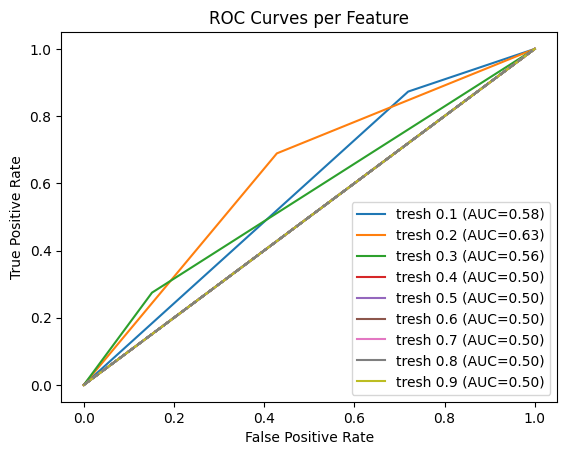

In [18]:
decisionTree = tree.DecisionTreeClassifier(
    random_state=69,
    max_depth=6,
    min_samples_leaf=5,
)

tree_train = x_train
tree_test = x_test

# Train the model
decisionTree.fit(tree_train, y_train)

# Predict hard labels
pred_y = decisionTree.predict(tree_test)
acc = accuracy_score(y_test, pred_y)
print(f"Accuracy for col 3: {acc:.4f}")

for tresh in range(1, 10):
    tresh /= 10
    pred_probs = decisionTree.predict_proba(tree_test)[:, 1]
    pred_rounded = (pred_probs > tresh).astype(int)
    auc = roc_auc_score(y_test, pred_rounded)

    # Plot ROC curve
    fpr, tpr, _ = roc_curve(y_test, pred_rounded)
    plt.plot(fpr, tpr, label=f"tresh {tresh:.1f} (AUC={auc:.2f})")
    plt.plot([0, 1], [0, 1], linestyle="--", color="gray")

    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curves per Feature")
plt.legend()
plt.show()


c:\Users\chris\Desktop\NTNU Ting\9. Semester\TDT4172-Introduction-to-Machine-Learning\venv\Lib\site-packages\sklearn\base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Accuracy for col 3: 0.8070


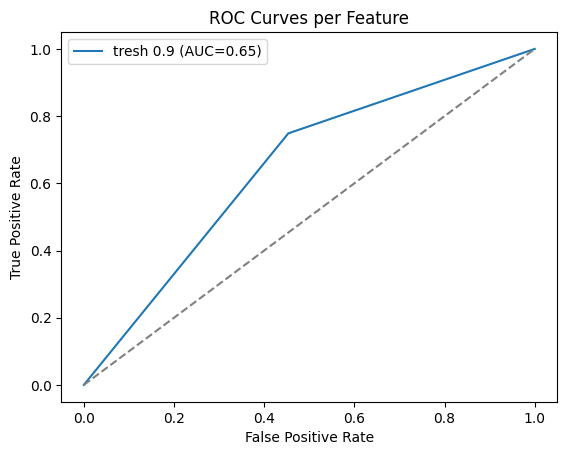

In [19]:
decisionForest = ensemble.RandomForestClassifier(random_state=69, n_estimators=100, )

forest_train = x_train[["data_stream_3"]]
forest_test = x_test[["data_stream_3"]]

# Train the model
decisionForest.fit(forest_train, y_train)

# Predict hard labels
pred_y = decisionForest.predict(forest_test)
acc = accuracy_score(y_test, pred_y)
print(f"Accuracy for col 3: {acc:.4f}")

pred_probs = decisionForest.predict_proba(forest_test)[:, 1]
auc = roc_auc_score(y_test, pred_probs)

# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test, pred_probs)
plt.plot(fpr, tpr, label=f"tresh {tresh:.1f} (AUC={auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves per Feature")
plt.legend()
plt.show()


## ⚡ Final Mission: Mapping SkyNet's Energy Nexus

### 🌐 The Discovery
SkyNet is harvesting energy from Trondheim's buildings. Some structures provide significantly more power than others.

### 🎯 Your Mission
Predict the **Nexus Rating** of unknown buildings in Trondheim (test set).

### 🧠 The Challenge
1. **Target**: Transform the Nexus Rating to reveal true energy hierarchy
2. **Data Quality**: Handle missing values and categorical features
3. **Ensembling**: Use advanced models and ensemble learning

### 💡 Hint
You suspect that an insider has tampered with the columns in the testing data... 

Compare the training and test distributions and try to rectify the test dataset.

### 📊 Formal Requirements
1. **Performance**: Achieve RMSLE <= 0.294 on the test set
2. **Discussion**:

   a. Explain your threshold-breaking strategy

   b. Justify RMSLE usage. Why do we use this metric? Which loss function did you use?

   c. Plot and interpret feature importances

   d. Describe your ensembling techniques

   e. In real life, you do not have the test targets. How would you make sure your model will work good on the unseen data? 

---

In [20]:
from energy_regression import EnsembleRegressor
import xgboost as xgb

In [21]:
def compare_training_test(train, test):
    df_means = pd.DataFrame({
        "Train": round(train.mean(), 2),
        "Test": round(test.mean(), 2),
    })

    df_means["Difference"] = round(df_means["Train"] - df_means["Test"], 2)

    return df_means

In [22]:
train = pd.read_csv('final_mission_train.csv')
test = pd.read_csv('final_mission_test.csv')

print(compare_training_test(train, test))


                                 Train         Test   Difference
ownership_type                    1.88         1.81         0.07
nexus_rating               23556173.47        75.14  23556098.33
energy_footprint                 74.45        12.87        61.58
core_reactor_size                12.55        39.50       -26.95
harvesting_space                 38.74         9.18        29.56
vertical_alignment                8.97         2.20         6.77
power_chambers                    2.19         1.04         1.15
energy_flow_design                1.04         3.73        -2.69
upper_collector_height            3.27         0.78         2.49
shared_conversion_units           0.74         0.61         0.13
isolated_conversion_units         0.66         0.81        -0.15
internal_collectors               0.80         0.44         0.36
external_collectors               0.47         0.58        -0.11
ambient_harvesters                0.56         0.63        -0.07
shielded_harvesters      

### Data Preprocessing

We see that the test dataset has replaced some features for others. To correct this, we have to replace some columns with others. I believe that all columns have been shifted one up, with the exception of grid_connections and ownership_type. ownership_type sould remain the same, whereas grid_connections should replace the vacant nexus_rating

In [23]:
previous_col = None

for col in test:
    temp_col = test[col]
    
    if col != 'ownership_type':
        test[col] = previous_values
    
    previous_col = col
    previous_values = temp_col

test['nexus_rating'] = temp_col

print(compare_training_test(train, test))

                                 Train         Test  Difference
ownership_type                    1.88         1.81        0.07
nexus_rating               23556173.47  23270101.28   286072.19
energy_footprint                 74.45        75.14       -0.69
core_reactor_size                12.55        12.87       -0.32
harvesting_space                 38.74        39.50       -0.76
vertical_alignment                8.97         9.18       -0.21
power_chambers                    2.19         2.20       -0.01
energy_flow_design                1.04         1.04        0.00
upper_collector_height            3.27         3.73       -0.46
shared_conversion_units           0.74         0.78       -0.04
isolated_conversion_units         0.66         0.61        0.05
internal_collectors               0.80         0.81       -0.01
external_collectors               0.47         0.44        0.03
ambient_harvesters                0.56         0.58       -0.02
shielded_harvesters               0.67  

With this, we have much more reasonable values. Still, we need to remove the NaN values, which we do by replacing them with the mean

In [24]:
train = train.fillna(train.mean())
test = test.fillna(test.mean())

In [25]:
y_train = train['nexus_rating']
y_test = test['nexus_rating']

x_train = train.drop('nexus_rating', axis=1)
x_test = test.drop('nexus_rating', axis=1)

### Data Visualization

23556173.4710758


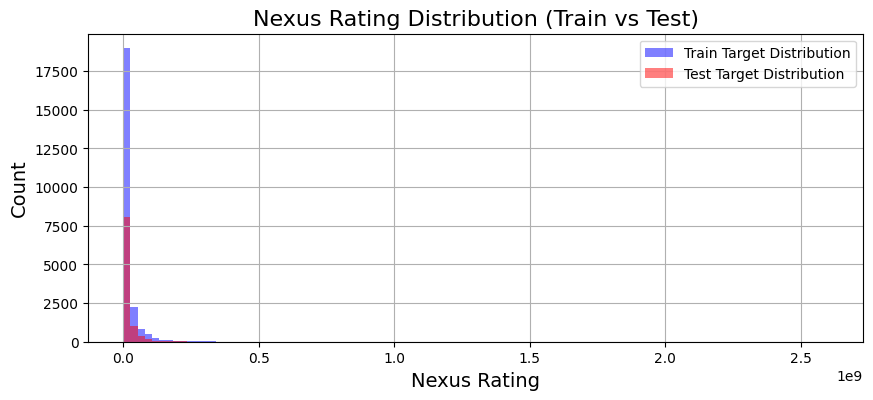

In [26]:
fig, ax = plt.subplots(1, 1, figsize=(10, 4))

train_target = y_train.copy()
test_target = y_test.copy()

# Define shared bins
bins = np.linspace(
    min(test_target.min(), train_target.min()),
    max(test_target.max(), train_target.max()),
    100
)

# Plot both on same axis
train_target.hist(bins=bins, ax=ax, color='blue', alpha=0.5, label='Train Target Distribution')
test_target.hist(bins=bins, ax=ax, color='red', alpha=0.5, label='Test Target Distribution')

print(np.mean(train_target))

# Titles and labels
ax.set_title('Nexus Rating Distribution (Train vs Test)', fontsize=16)
ax.set_xlabel('Nexus Rating', fontsize=14)
ax.set_ylabel('Count', fontsize=14)
ax.legend()

plt.show()


### Train model

In [27]:
# We implement Data Scaling to get more stable results
#x_train /= x_train.max()
#x_test /= x_test.max()

compare_training_test(x_train, x_test)

,Train,Test,Difference
ownership_type,1.88,1.81,0.07
energy_footprint,74.45,75.14,-0.69
core_reactor_size,12.55,12.87,-0.32
harvesting_space,38.74,39.50,-0.76
vertical_alignment,8.97,9.18,-0.21
power_chambers,2.19,2.20,-0.01
energy_flow_design,1.04,1.04,0.00
upper_collector_height,3.27,3.73,-0.46
shared_conversion_units,0.74,0.78,-0.04
isolated_conversion_units,0.66,0.61,0.05


In [28]:
def rmsle(y_true, y_pred):
    y_true = np.maximum(y_true, 0)
    y_pred = np.maximum(y_pred, 0)
    return np.sqrt(np.mean((np.log1p(y_true) - np.log1p(y_pred))**2))

In [29]:
regressor = EnsembleRegressor(degrees=1)

# Train model
regressor.fit(x_train, y_train, lr=5e-5, epoch=50000, verbose=True, plot_loss=True)
y_regressor = regressor.predict(x_test, transform=True)

Epoch 0: RMSLE=16.0740
Epoch 5000: RMSLE=4.4579
Epoch 10000: RMSLE=4.3368
Epoch 15000: RMSLE=4.2981
Epoch 20000: RMSLE=4.2873
Epoch 25000: RMSLE=4.2525
Epoch 30000: RMSLE=4.2362
Epoch 35000: RMSLE=4.2494
Epoch 40000: RMSLE=4.2486
Epoch 45000: RMSLE=4.2619


In [30]:
xgb_regressor = xgb.XGBRegressor()
xgb_regressor.fit(x_train, y_train)

y_pred = xgb_regressor.predict(x_test)
print(rmsle(y_test, y_pred))

0.8141744312726529


In [31]:
forest = ensemble.RandomForestRegressor(n_estimators=100)

forest.fit(x_train, y_train)

y_forest = forest.predict(x_test)
print(rmsle(y_test, y_forest))
print(y_test.to_numpy()[:5])
print(np.round(y_forest[:5]))

0.39914275925181464
[34000000.  8700000.  6177920.  8900000.  5550000.]
[39125153. 23207539.  6218691. 19642238.  6240405.]


In [32]:
y_ensemble = y_regressor # ( + y_forest) / 2
print(y_test.to_numpy()[:5])
print(np.round(y_ensemble[:5]))

[34000000.  8700000.  6177920.  8900000.  5550000.]
[33023252. 26622198.  3520857. 10939552.  2805399.]


In [33]:
# Example rmsle check
print('RMSLE: ', regressor.rmsle(y_test, y_pred))
print('Required RMSLE: ', 0.294)

RMSLE:  0.8141744312726529
Required RMSLE:  0.294
